# Lesson 1 - Wht's that number?

Try to address the Synthetic Digits dataset using concepts from lesson1/v3

https://www.kaggle.com/prasunroy/synthetic-digits/home


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [2]:
from fastai import *
from fastai.vision import *

# Prerequisite: install kaggle api

Follow instructions on https://github.com/Kaggle/kaggle-api

The main steps are installing the cli ("pip install kaggle") and setting up your credentials on ~/.kaggle/kaggle.json

## Download dataset from kaggle

In [125]:
#Prepare dataset props
dataset_name='prasunroy/synthetic-digits' # this is the kaggle dataset name
dest_folder_name='synthetic-digits' # sub folder of fast.ai data folder

Call kaggle cli to download dataset and unzip it. 

In [5]:
#Prepare params
from fastai.datasets import datapath4file
path = datapath4file(f'{(dest_folder_name)}')
dest_folder = path.as_posix()
#print(dest_folder)

/home/ste/.fastai/data/synthetic-digits


In [ ]:
# Call kaggle cli to download and unzip
!kaggle datasets download -d {dataset_name} -p {dest_folder} --unzip

## Looking at the data

In [6]:
#Define dataset base path
path

PosixPath('/home/ste/.fastai/data/synthetic-digits')

In [8]:
#Tak a look at dataset
path.ls()

['synthetic_digits']


In [14]:
#Define paths
path_train = path/'synthetic_digits'/'imgs_train'
path_valid = path/'synthetic_digits'/'imgs_valid'

In [13]:
path_train.ls()

['6', '0', '2', '1', '7', '3', '5', '9', '8', '4']

In [16]:
path_valid.ls()

['6', '0', '2', '1', '7', '3', '5', '9', '8', '4']

## Create DataBunch and take a look

In [36]:
tfms = get_transforms(do_flip=False, max_zoom=.9)
data = ImageDataBunch.from_folder(path=path, train=path_train, valid=path_valid, ds_tfms=tfms, size=64, bs=64)
data.normalize(imagenet_stats)

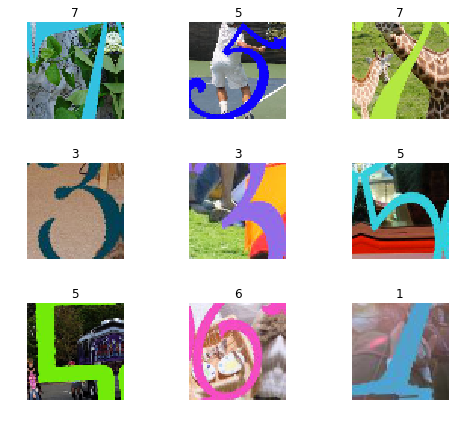

In [37]:
data.show_batch(rows=3, figsize=(7,6))

In [23]:
print(data.classes)
len(data.classes),data.c

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


(10, 10)

## Train network manually...

In [38]:
learn = ConvLearner(data, models.resnet34, metrics=error_rate)

In [39]:
#First pass
learn.fit_one_cycle(4)
learn.save('last') # to recover if next pass is bad

Total time: 00:25
epoch  train loss  valid loss  error_rate
1      1.774838    1.119977    0.393500    (00:06)
2      1.062835    0.613628    0.221500    (00:06)
3      0.752141    0.438414    0.151500    (00:06)
4      0.673061    0.417917    0.152000    (00:06)



In [40]:
#Second pass
learn.fit_one_cycle(4)
learn.save('last') # to recover if next pass is bad

Total time: 00:25
epoch  train loss  valid loss  error_rate
1      0.637617    0.376785    0.132500    (00:06)
2      0.548349    0.272450    0.089500    (00:06)
3      0.413104    0.200455    0.069500    (00:06)
4      0.374970    0.195416    0.064000    (00:06)



In [41]:
#Third pass
learn.fit_one_cycle(4)
learn.save('last') # to recover if next pass is bad

Total time: 00:25
epoch  train loss  valid loss  error_rate
1      0.396310    0.223925    0.074000    (00:06)
2      0.365672    0.164806    0.053000    (00:06)
3      0.334563    0.138244    0.045500    (00:06)
4      0.293227    0.135182    0.045000    (00:06)



In [42]:
#Fourth pass
learn.fit_one_cycle(4)
learn.save('last') # to recover if next pass is bad

Total time: 00:25
epoch  train loss  valid loss  error_rate
1      0.284084    0.133825    0.049000    (00:06)
2      0.294290    0.133188    0.046000    (00:06)
3      0.272772    0.121243    0.044000    (00:06)
4      0.243903    0.114067    0.037000    (00:06)



In [43]:
#Fifth pass
learn.fit_one_cycle(4)
learn.save('last') # to recover if next pass is bad

Total time: 00:25
epoch  train loss  valid loss  error_rate
1      0.244101    0.117967    0.039500    (00:06)
2      0.263167    0.110393    0.038500    (00:06)
3      0.245711    0.101164    0.031000    (00:06)
4      0.215711    0.098949    0.033500    (00:06)



In [47]:
#Sixth big pass
learn.fit_one_cycle(10)
learn.save('last') # to recover if next pass is bad

Total time: 01:02
epoch  train loss  valid loss  error_rate
1      0.215302    0.097862    0.034500    (00:06)
2      0.202195    0.102646    0.039500    (00:06)
3      0.213173    0.102112    0.033000    (00:06)
4      0.213564    0.101151    0.035500    (00:06)
5      0.236369    0.109938    0.040000    (00:06)
6      0.218443    0.099494    0.034000    (00:06)
7      0.186971    0.086600    0.029000    (00:06)
8      0.167518    0.087242    0.030500    (00:06)
9      0.172774    0.086958    0.031000    (00:06)
10     0.163386    0.086682    0.030500    (00:06)



## Results

In [48]:
interp = ClassificationInterpretation.from_learner(learn)

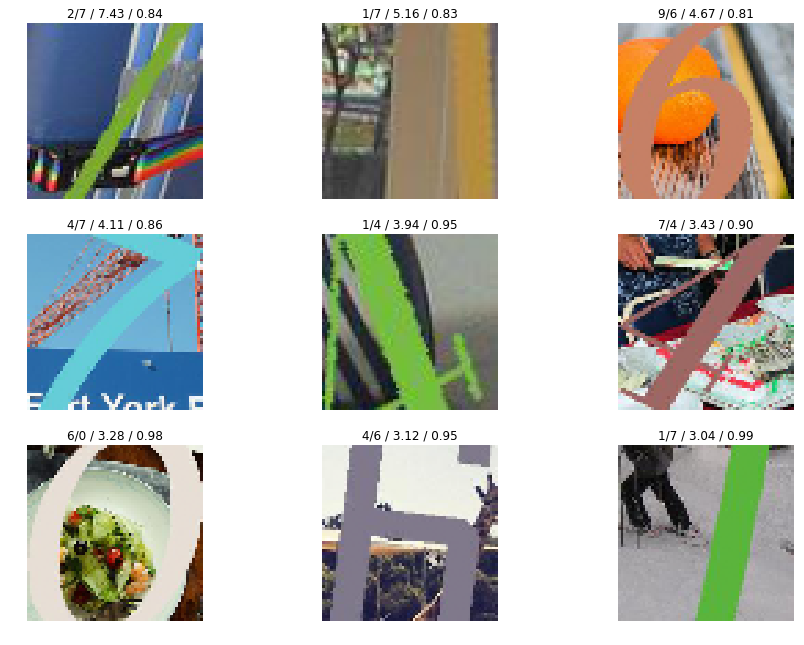

In [49]:
interp.plot_top_losses(9, figsize=(15,11))

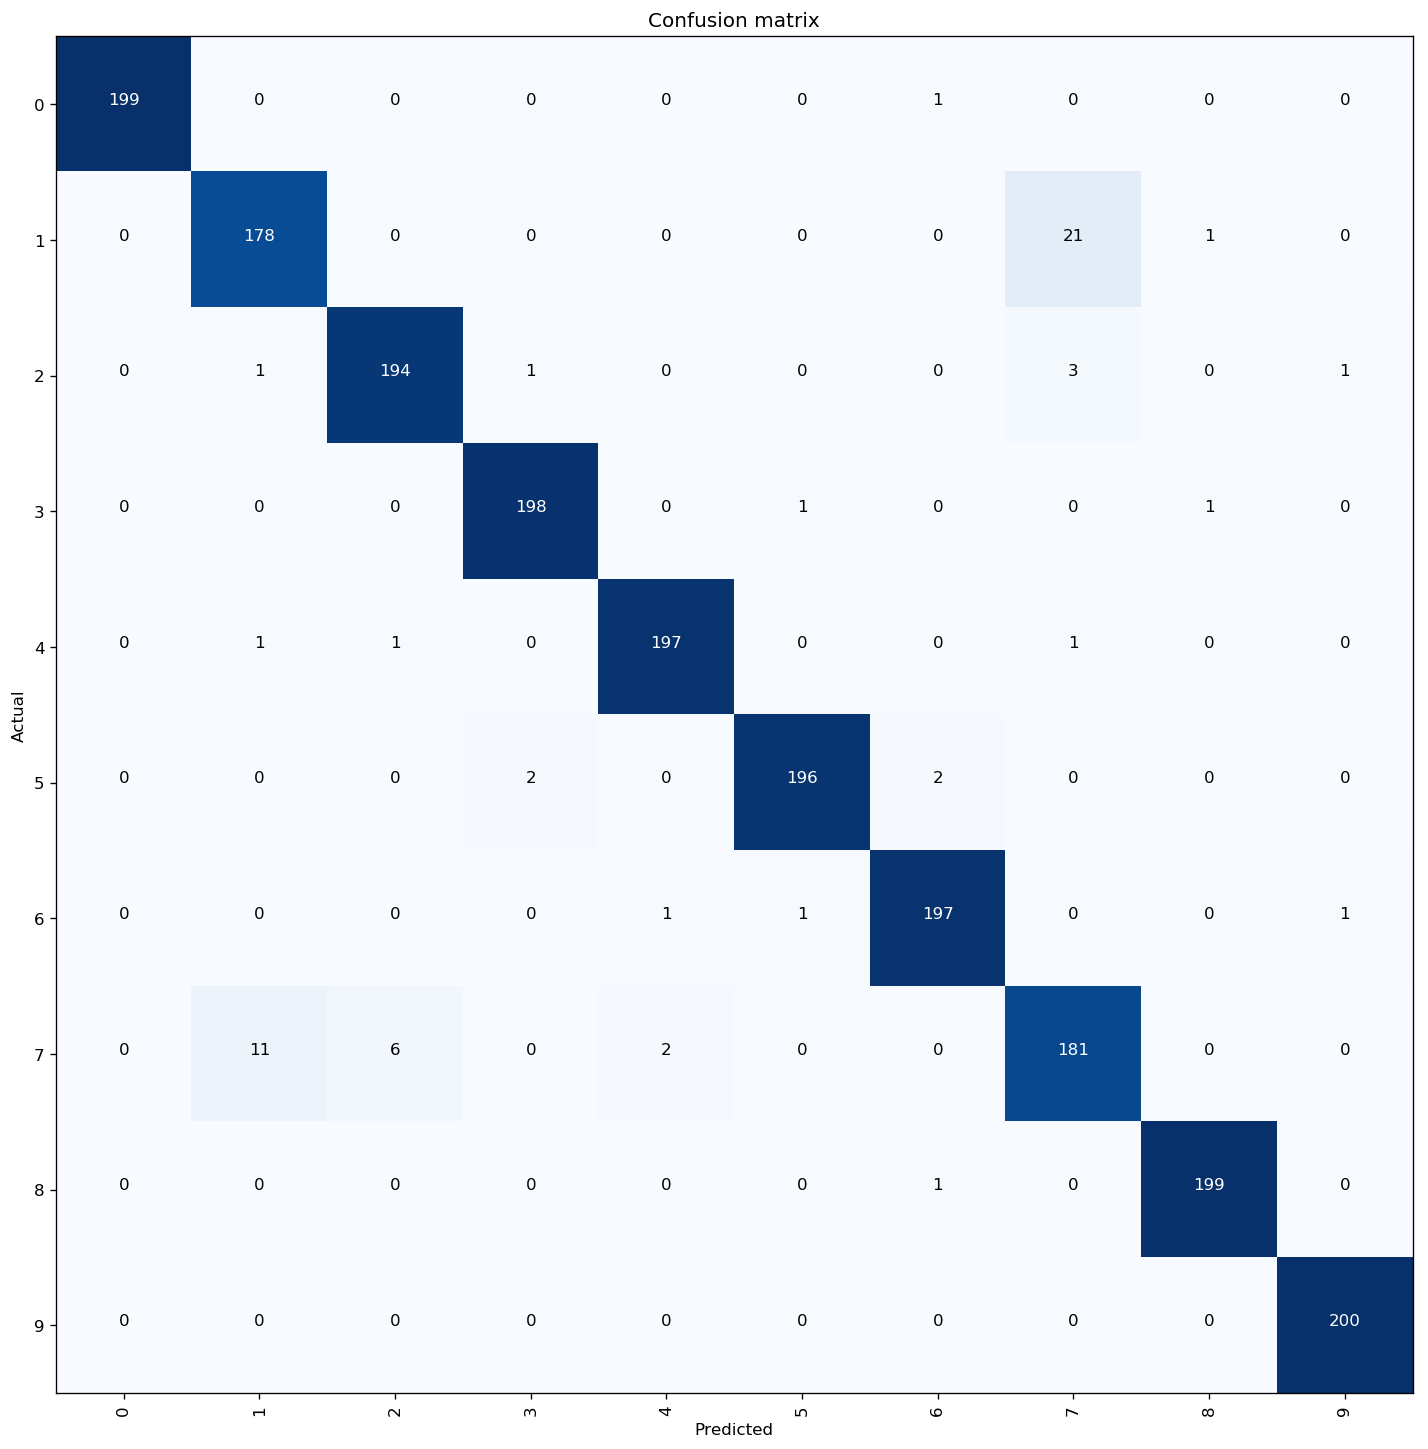

In [50]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=120)

In [51]:
interp.most_confused(min_val=2)

[('1', '7', 21), ('7', '1', 11), ('7', '2', 6), ('2', '7', 3)]

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. Later in the course you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here.

In [52]:
tfms = get_transforms(do_flip=False, max_zoom=.9)
data = ImageDataBunch.from_folder(path=path, train=path_train, valid=path_valid, ds_tfms=tfms, size=128, bs=64)
data.normalize(imagenet_stats)

In [53]:
learn = ConvLearner(data, models.resnet50, metrics=error_rate)

In [54]:
learn.fit_one_cycle(5)

Total time: 01:44
epoch  train loss  valid loss  error_rate
1      1.175310    0.521462    0.188500    (00:23)
2      0.473615    0.171191    0.054500    (00:20)
3      0.245155    0.090989    0.032500    (00:20)
4      0.188095    0.076110    0.028500    (00:20)
5      0.151285    0.069829    0.027000    (00:20)



WOW: 5 cycle with resnet-50 and size 128 are better than 40 cycle of previus one..

In [55]:
learn.save('last-50')

Give a second try

In [56]:
learn.fit_one_cycle(5)

Total time: 01:40
epoch  train loss  valid loss  error_rate
1      0.153354    0.078474    0.029500    (00:20)
2      0.174768    0.102739    0.033000    (00:20)
3      0.131616    0.061412    0.020500    (00:20)
4      0.104570    0.047041    0.015500    (00:20)
5      0.081146    0.042974    0.014000    (00:20)



It's getting better and better

In [57]:
learn.save('last-50')

Gibe another chance

In [92]:
learn.fit_one_cycle(5)

KeyboardInterrupt: 

**WARNING** It's starting to overfit. Restore previous 

In [93]:
learn.load('last-50')

## Very good Result

In [94]:
interp = ClassificationInterpretation.from_learner(learn)

In [95]:
r = interp.most_confused(min_val=0)
print(r)

[('1', '7', 15), ('7', '1', 8), ('4', '1', 2), ('7', '2', 2), ('5', '6', 1)]


In [82]:
number_of_errors = sum(map(lambda x: x[2], r))
number_of_errors

28

Incredible result: only 28 errors of what 22 was confusion between 1 and 7.

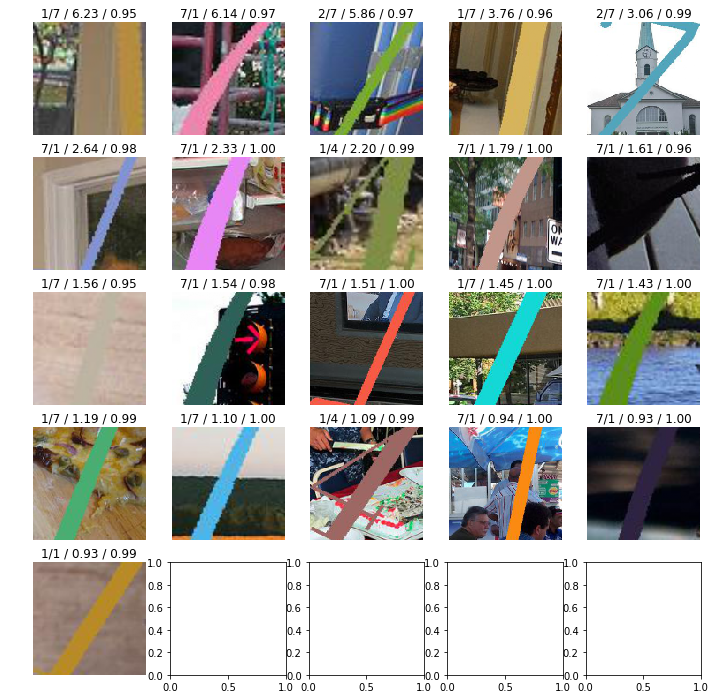

In [86]:
interp.plot_top_losses(21)

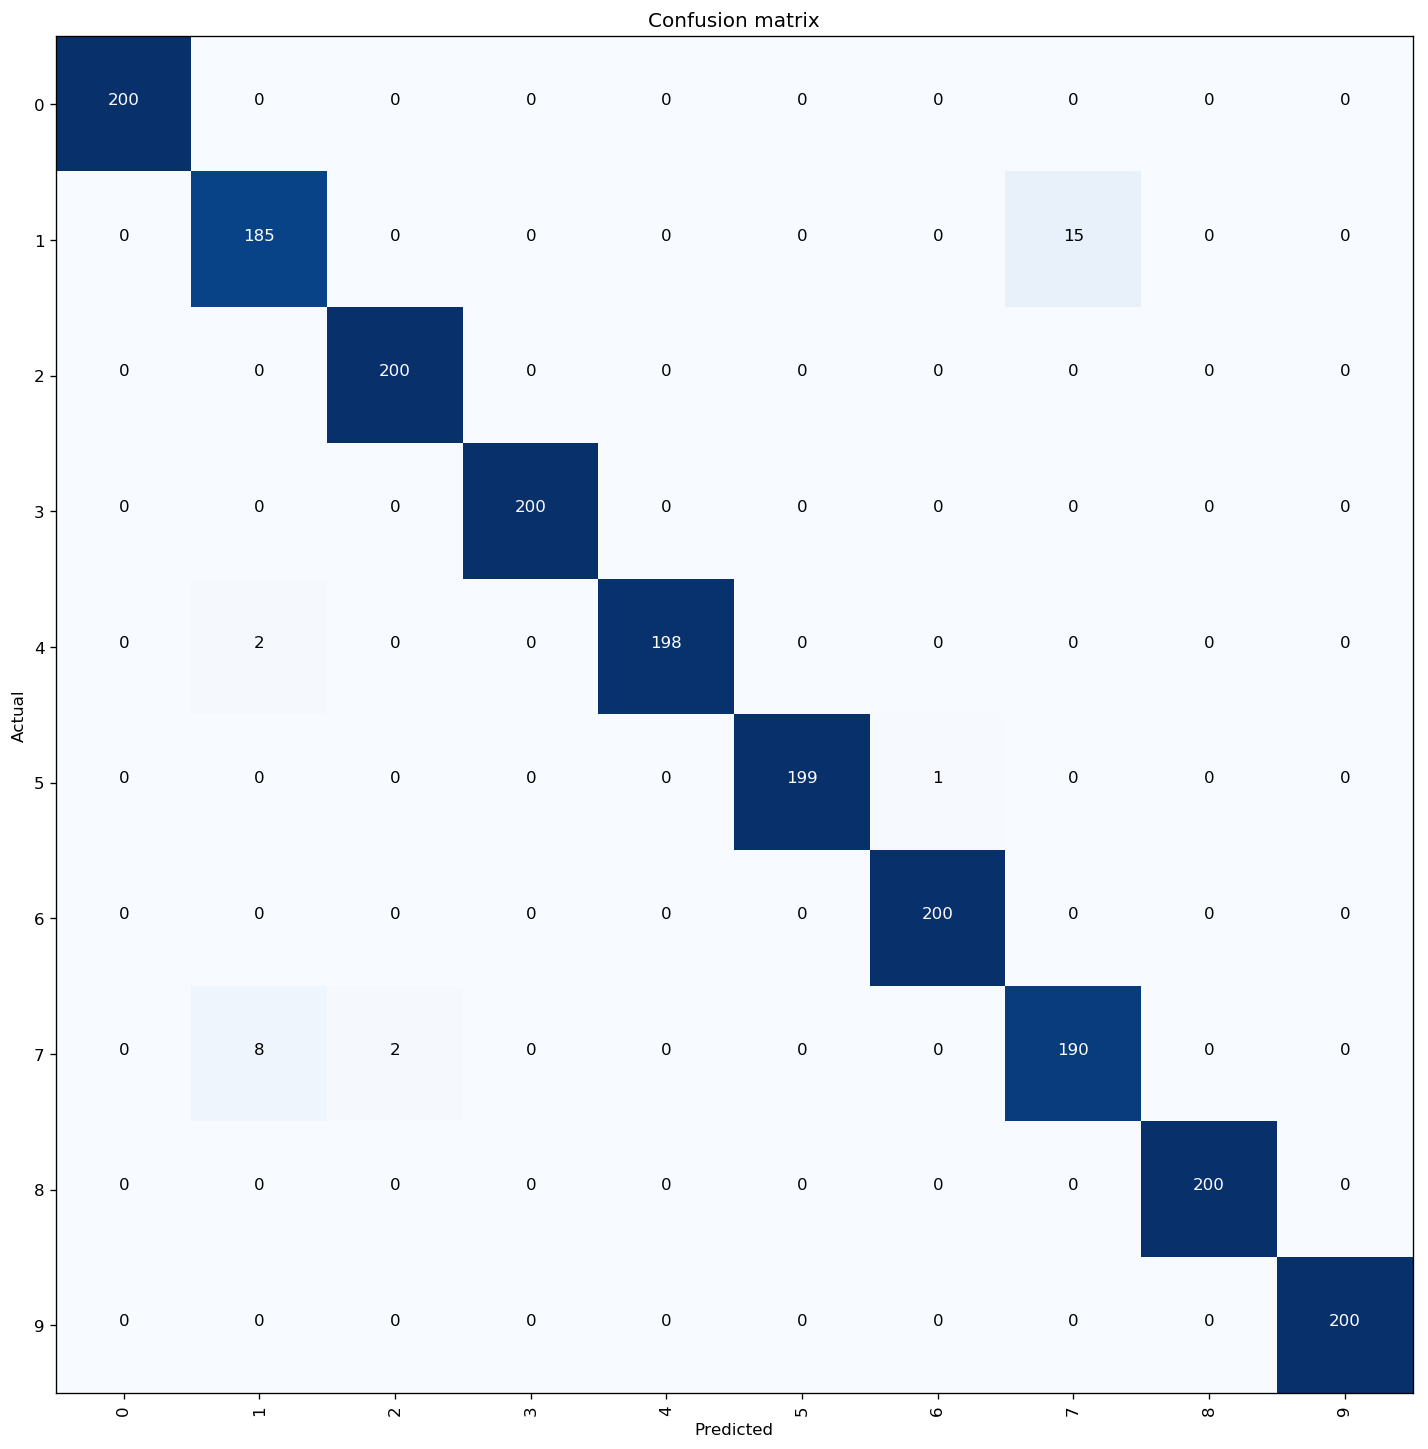

In [87]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=120)

## Lr Finder

In [96]:
learn.lr_find()

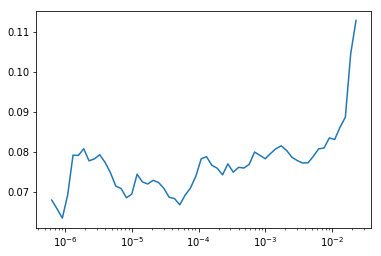

In [89]:
learn.recorder.plot()

In [97]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

Total time: 00:53
epoch  train loss  valid loss  error_rate
1      0.087432    0.046663    0.016000    (00:26)
2      0.072511    0.038764    0.013000    (00:26)



Unfreezing all the layers and carefully choosing learning rate, improove an exceptional result.

In [100]:
learn.save('last-50-best')

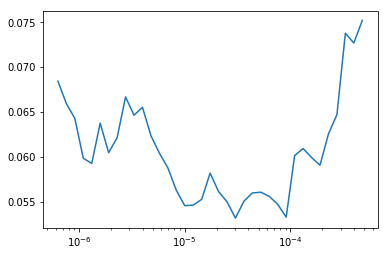

In [101]:
#second round
learn.lr_find()
learn.recorder.plot()

In [102]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

Total time: 00:53
epoch  train loss  valid loss  error_rate
1      0.081559    0.042506    0.017500    (00:26)
2      0.058352    0.037746    0.015000    (00:26)



Worse performance, give another try

In [113]:
learn.load('last-50-best')

In [107]:
learn.fit_one_cycle(2, max_lr=5e-5)

Total time: 00:53
epoch  train loss  valid loss  error_rate
1      0.090484    0.050168    0.015500    (00:26)
2      0.059423    0.032952    0.011000    (00:26)



We're almost overfitting, so we're done.

In [114]:
interp = ClassificationInterpretation.from_learner(learn)

In [115]:
r = interp.most_confused(min_val=0)
print(r)

[('1', '7', 12), ('7', '1', 6), ('4', '1', 2), ('2', '7', 1), ('7', '2', 1)]


In [124]:
number_of_errors = sum(map(lambda x: x[2], r))
number_of_test_items = interp.losses.size()[0]
e = number_of_errors/number_of_test_items
print(f'{number_of_errors}/{number_of_test_items} = {e}')

22/2000 = 0.011


Taking in account that the vast majority of errors are related to cropping and undecideable even for umans... 

**That's an incredible result!**